In [10]:
import matplotlib.pyplot as plt
import numpy as np
import dataToVar as dat
a = dat.h50
b = dat.h70
c = dat.h90_c
d = dat.h100



11368


0.018000000000000002
0.03

0.9772802889037515

0.9645456100221683


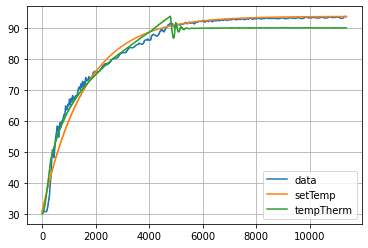

In [5]:
a = dat.h50
b = dat.h70
c = dat.h90_c
d = dat.h100

totalDat = [a,b,c,d]

samp = []
sampRaw = []
time = []
Tset = []
for i in totalDat:
    samp.append(-i[2][:len(b[2])]+max(i[2][:len(b[2])]))
    sampRaw.append(i[2][:len(b[2])])
    time.append(i[0][:len(b[2])])
    Tset.append(np.array(i[1][:len(b[2])]))


for i in Tset:
    for j in range(len(i)):
        if str(j[i]) == 'nan':
            j[i] = j[i-1]
offset = 5#0.001783387081181648*Tset**2 -0.12568814551147026*Tset+ 4.697092470876816





def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2

def decay(lam):
    z = []
    for i in range(len(totalDat)):
        z.append((max(totalDat[i][2])-min(totalDat[i][2]))*np.exp(-lam*time[i][:len(b[2])]))
    return z

def T(lam):
    z = []
    for i in range(len(Tset)):
        z.append((-Tset[i]+offset+30)*np.exp(-lam*time[i])+Tset[i]-offset)
        return z

tries = np.arange(0,1,.001)

zlist = []
for i in samp:
    for j in i:
        zlist.append(j)
###############################################################################################################################################################################################






big = np.arange(0,1,0.001)
for i in big:
    zlistfit = []
    for j in range(len(samp)):
        
       

        for k in time[j]:
            if str(k) == 'nan':
                print('fix csv')
                break
            else:
                zlistfit.append(old)
        

    r = r2surf(zlist,zlistfit)
    if r >0 and r<1:
        rr[r] = i

# print(rr)
print('r2=',max(rr)) 
   
trust = rr[max(rr)] 
print('a=',trust)
trust = .99802
# trust = .9957




